### Project Title: Analyzing Bank Customer Data for Credit Card Default Prediction

### Problem Description / Objectives: The project is aimed at  identifying the key drivers that determine the likelihood of credit card default and predicting the likelihood of credit card default for customers of the bank. Credit card default occurs when a customer fails to pay the minimum amount due on the credit card for consecutive months.

### Data Description: The dataset contains the customer transaction history for the past 6 months on the basis of which credit card default is to be predicted.
#### The project employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. The following 23 explanatory variables were used:
#### X1: Amount of the given credit (dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
#### X2: Gender (1 = male; 2 = female).
#### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
#### X4: Marital status (1 = married; 2 = single; 3 = others).
#### X5: Age (year).
#### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
#### Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
#### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
#### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [3]:
df = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/UCI_Credit_Card.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# Checking for null values
pd.DataFrame(df.isnull().sum(),columns = ['Count of missing values'])

,Count of missing values
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


#### The average value for the amount of credit card limit is 167,484, standard deviation is 129,747 ranging from 10K to 1 million dollars. Average age is 35.5 years with a standard deviation of 9.2 years.

In [8]:
# Checking for duplicate values
df[df.duplicated()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [9]:
# Getting the column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

### Exploratory Data Analysis

#### Analyzing the Dependent Variable:

In [10]:
df['Defaulter'] = df['default.payment.next.month']
df = df.drop('default.payment.next.month', axis=1)

In [11]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


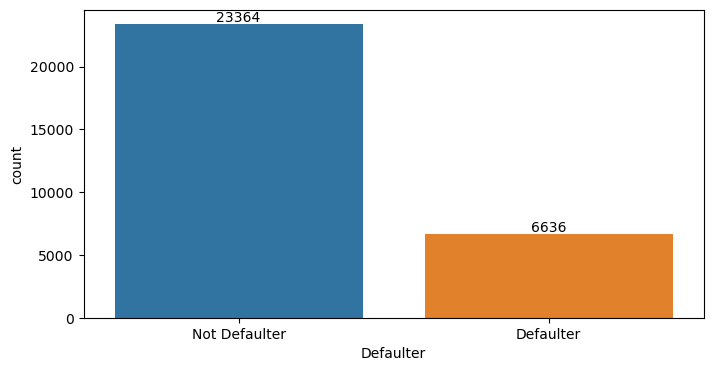

In [12]:
# Visualizing the target variable 'Default'
plt.figure(figsize = (8,4))
a = sns.countplot(x = 'Defaulter',data=df)
for label in a.containers:
    a.bar_label(label)
plt.xticks([0,1],labels = ['Not Defaulter','Defaulter'])
plt.show()

In [13]:
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

### Independent Variable:

#### Categorical Variables:

In [14]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [15]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
# There are values 0,5,6 in the education datset for which there is no description. We try to replace those by 4
df['EDUCATION'] = df['EDUCATION'].replace({0:4,5:4,6:4})
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [17]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
# We have less values for 0 so I'm adding them to the 'Others' Category,i.e 3
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [19]:
# Plotting the categorical features
categorical_features = ['SEX','EDUCATION','MARRIAGE']

In [20]:
df_cat = df[categorical_features]

In [21]:
df_cat = df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}})

int64


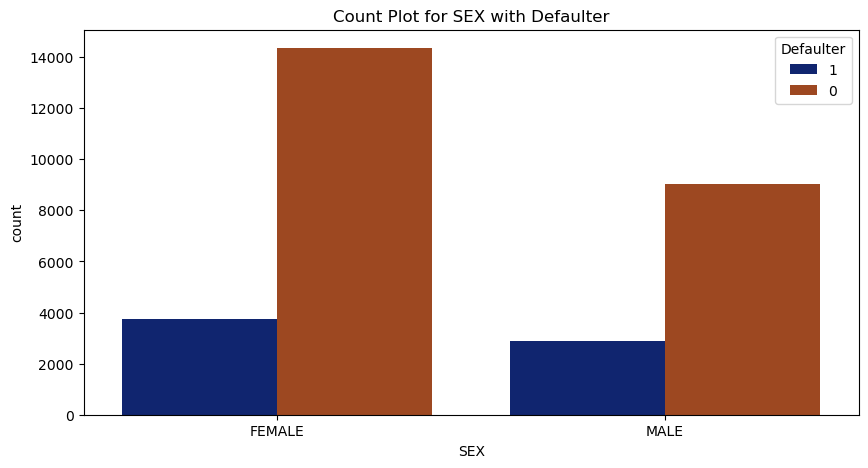

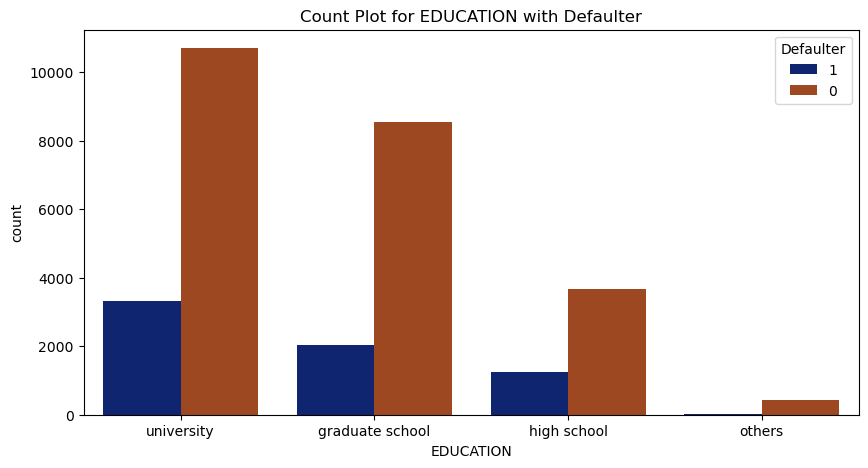

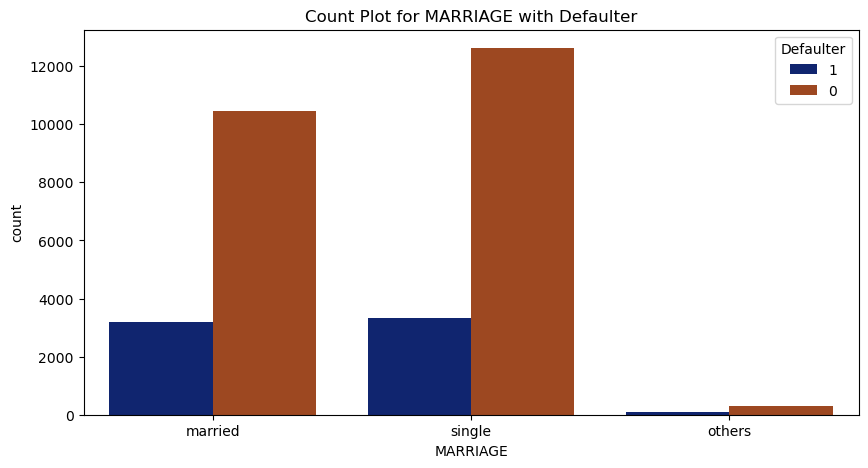

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check data type of 'Defaulter' column
print(df['Defaulter'].dtype)

# Convert 'Defaulter' column to string type if needed
df['Defaulter'] = df['Defaulter'].astype(str)

for col in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue=df['Defaulter'], data=df_cat,palette='dark')
    plt.title(f'Count Plot for {col} with Defaulter')
    plt.show()


#### Observations for Categorical Features:
#### No. of defaulters have a higher proportion of females.
#### No. of defaulters have a higher proportion of educated people
#### No of defaulters have a higher proportion of singles

#### Numerical Variables:

In [23]:
# Analyzing limit_bal
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

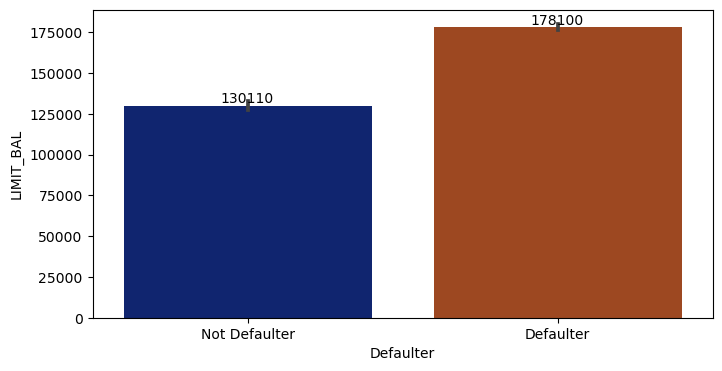

In [24]:
# Visualizing the target variable 'Default'
plt.figure(figsize = (8,4))
b = sns.barplot(x = 'Defaulter', y = 'LIMIT_BAL',data=df, palette = 'dark')
for label in b.containers:
    b.bar_label(label)
plt.xticks([0,1],labels = ['Not Defaulter','Defaulter'])
plt.show()

<Axes: xlabel='Defaulter', ylabel='LIMIT_BAL'>

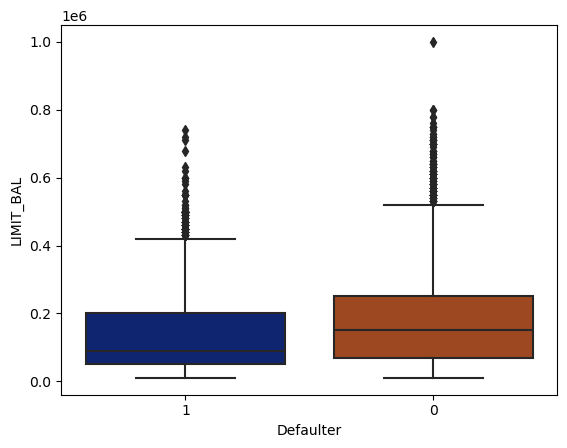

In [25]:
sns.boxplot(x = 'Defaulter', y= 'LIMIT_BAL',data = df,palette = 'dark')

#### We observe that defaulters on average have a lower limit_bal.

In [26]:
# Renaming columns
df = df.rename(columns = {'PAY_0':'PAY_SEPT', 'PAY_2':'PAY_AUG','PAY_3': 'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'})
df = df.rename( columns = {'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'})  
df = df.rename(columns = {'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'})

In [27]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [28]:
# Age
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [29]:
df['AGE'] = df['AGE'].astype('int')

<Axes: xlabel='index', ylabel='AGE'>

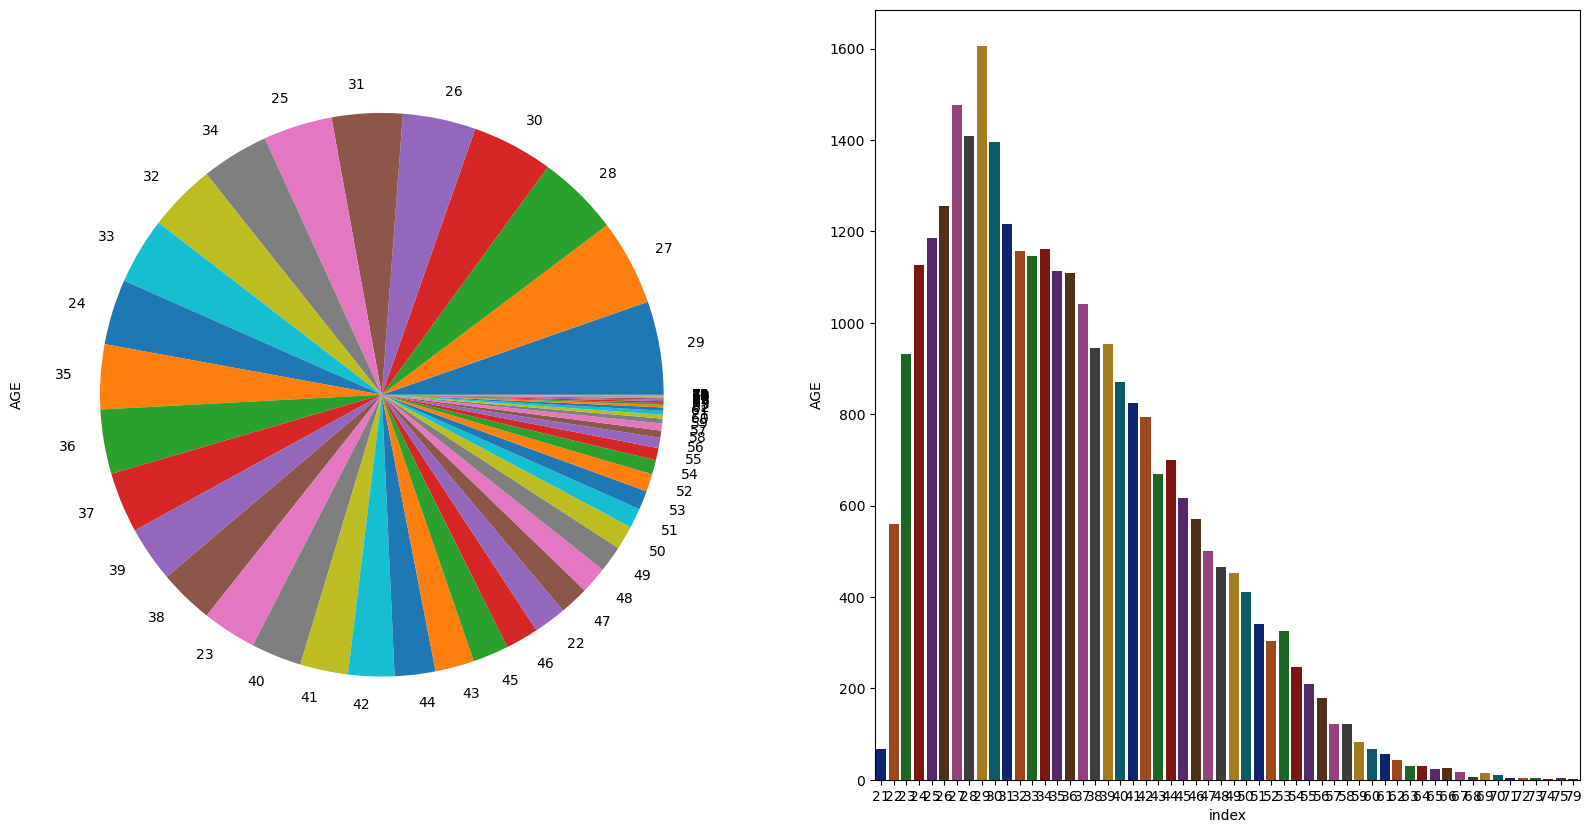

In [30]:
fig, axes = plt.subplots(ncols =2, figsize = (20,10))
Day_df = df['AGE'].value_counts().reset_index()
df['AGE'].value_counts().plot(kind = 'pie',ax =axes[0],subplots= True)
sns.barplot(x = 'index', y = 'AGE', data = Day_df,ax = axes[1], palette='dark')

In [31]:
df.groupby('Defaulter')['AGE'].mean()

Defaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

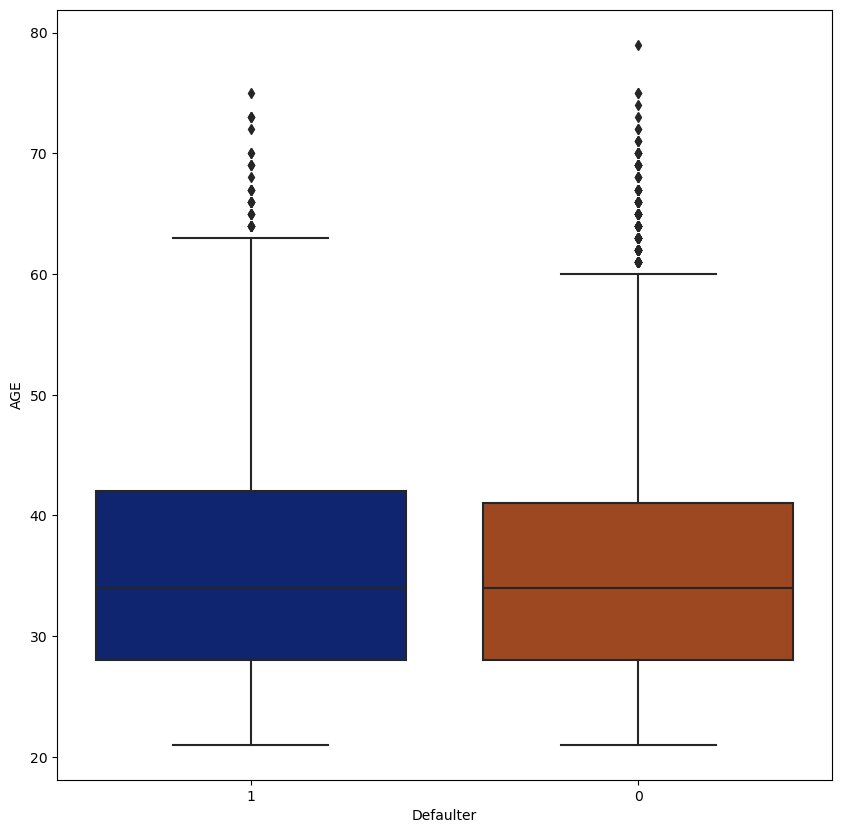

In [32]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = 'Defaulter', y= 'AGE', data = df, palette='dark')

#### We observe that age doesn't have much impact on credit card defaulter prediction.

In [33]:
# Bill amount

bill_amt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

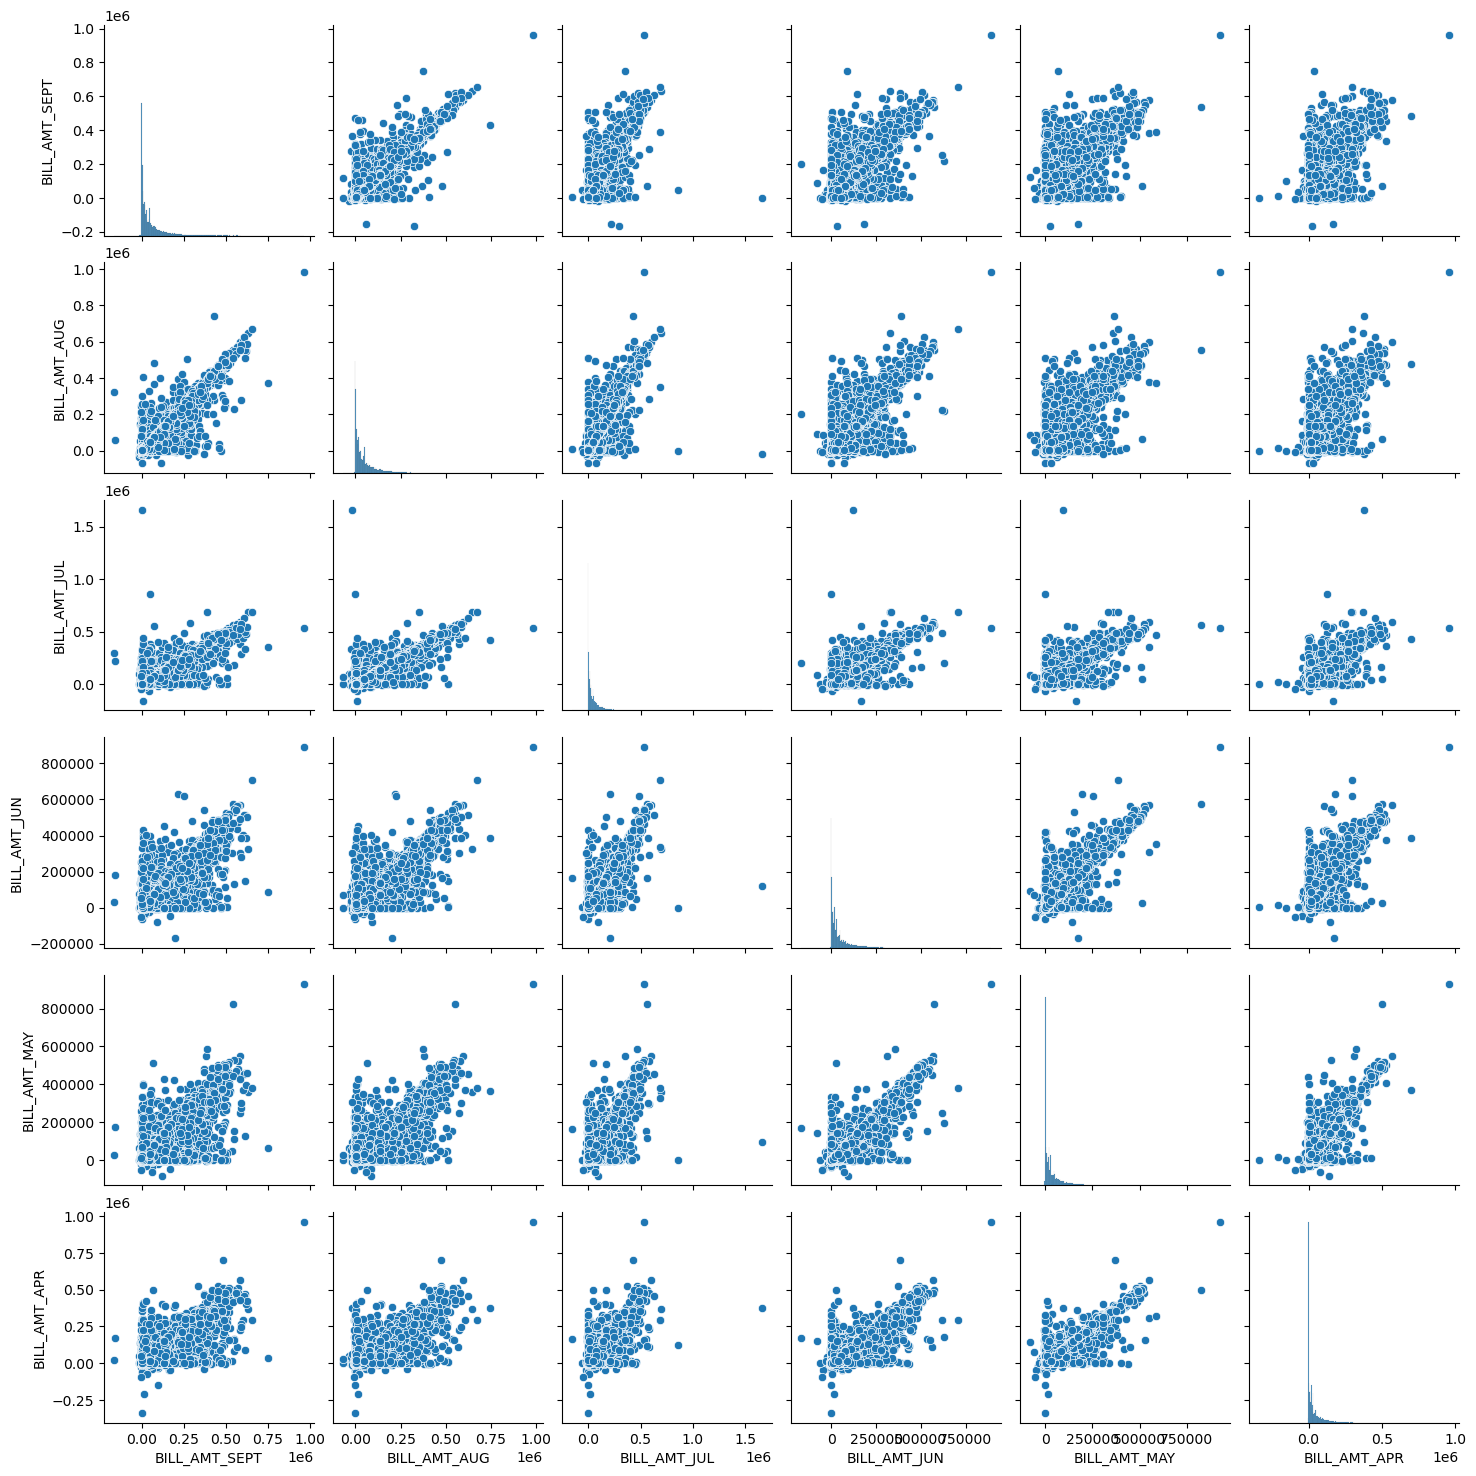

In [34]:
sns.pairplot(data = bill_amt_df)

object


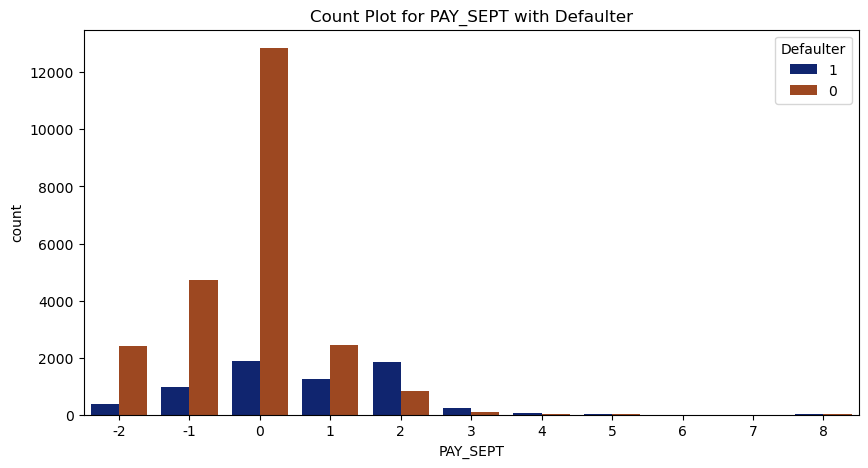

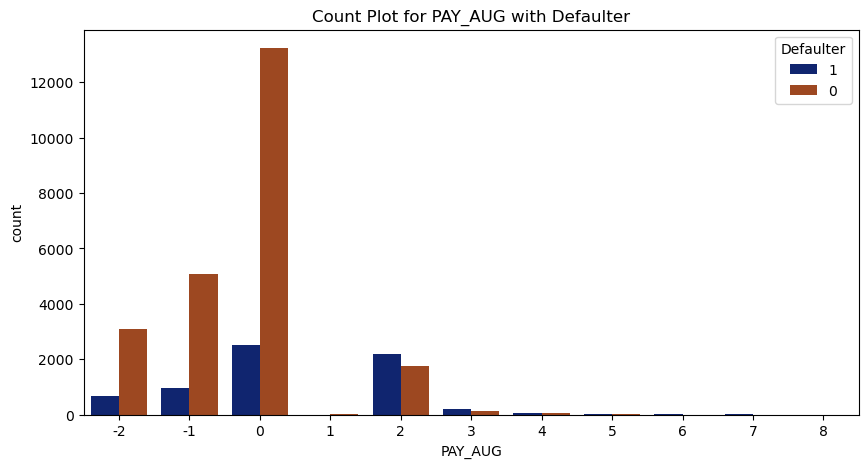

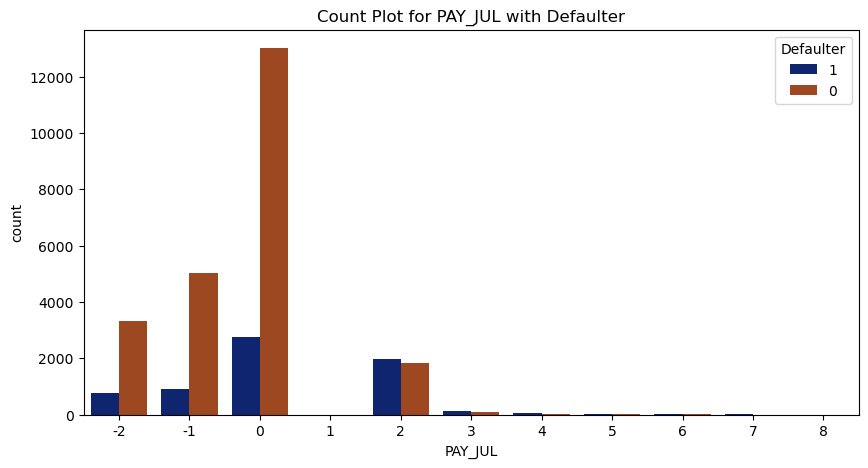

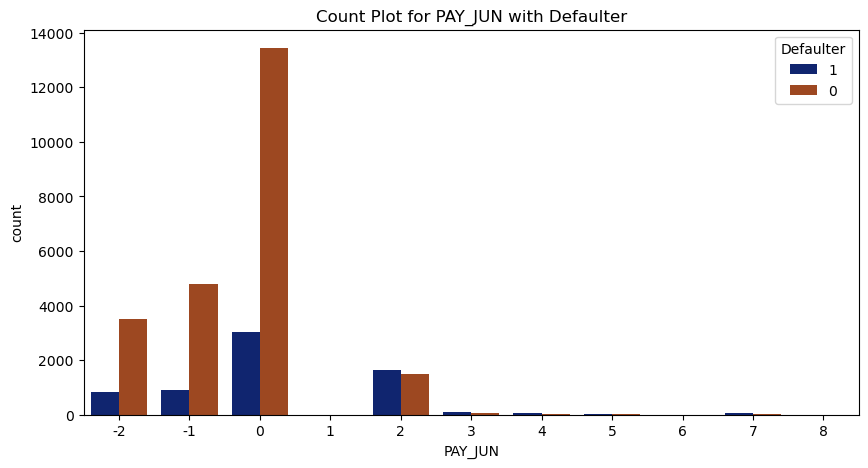

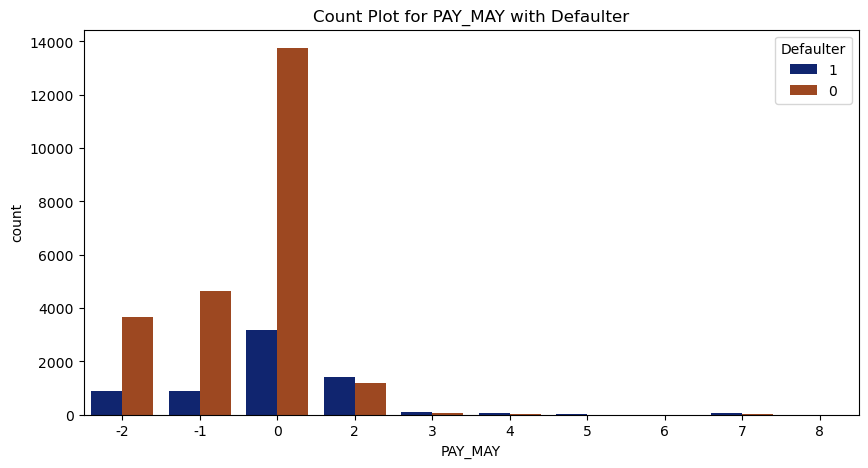

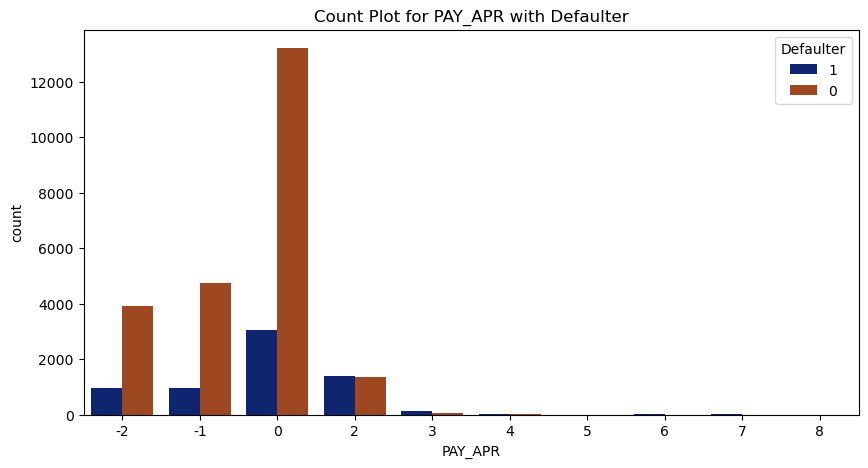

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check data type of 'Defaulter' column
print(df['Defaulter'].dtype)

# Convert 'Defaulter' column to string type if needed
df['Defaulter'] = df['Defaulter'].astype(str)

# History payment status
pay_col = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

for col in pay_col:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Defaulter', data=df, palette = 'dark')
    plt.title(f'Count Plot for {col} with Defaulter')
    plt.show()

In [36]:
# Paid amount
pay_amt_df = df[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR','Defaulter']]

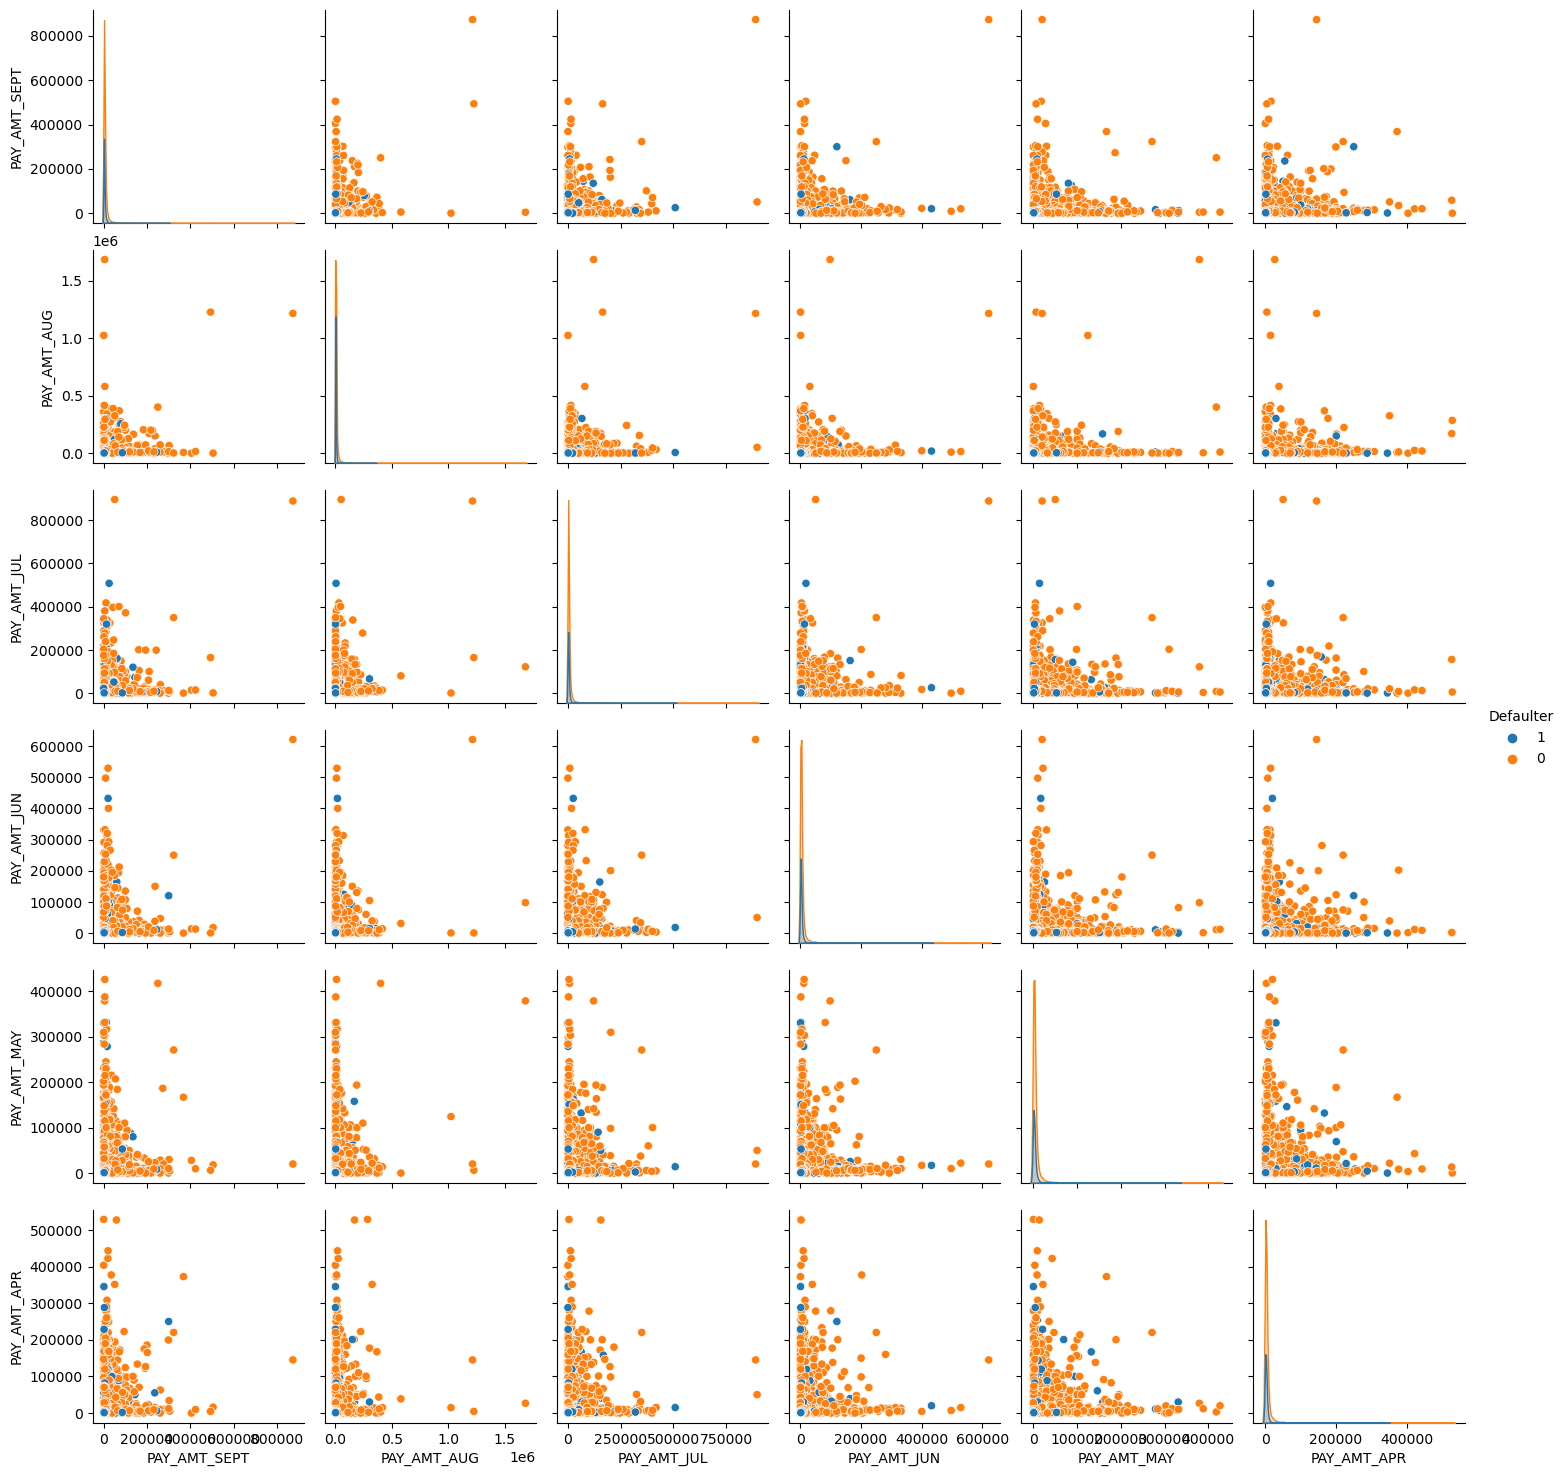

In [37]:
sns.pairplot(data = pay_amt_df, hue = 'Defaulter')

In [38]:
df.shape

(30000, 25)

In [39]:
df.drop('ID', axis=1, inplace=True)

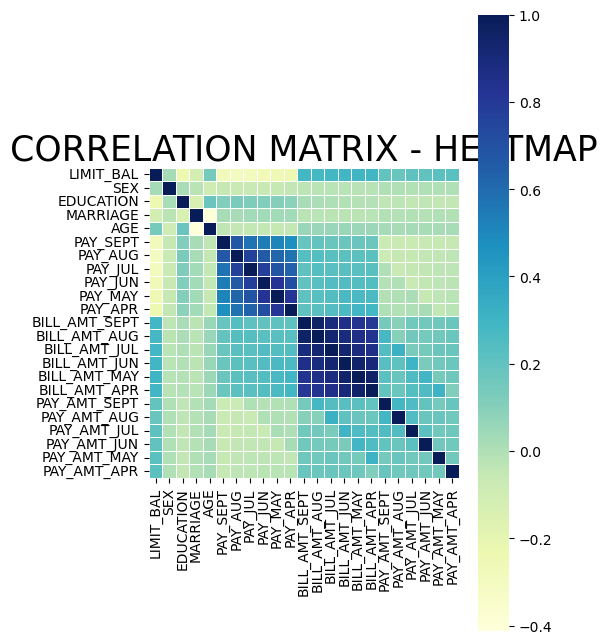

In [40]:
# Correlation Matrix defined via Pearson Function
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(5,8))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.2f', 
            xticklabels= True, yticklabels= True
            ,cmap="YlGnBu", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=25);

### Feature Engineering

In [41]:
df['Payment_Value'] = df['PAY_SEPT'] + df['PAY_AUG'] + df['PAY_JUL'] + df['PAY_JUN'] + df['PAY_MAY'] + df['PAY_APR']

In [42]:
df.groupby('Defaulter')['Payment_Value'].mean()

Defaulter
0   -1.980140
1    2.023056
Name: Payment_Value, dtype: float64

<Axes: xlabel='Defaulter', ylabel='Payment_Value'>

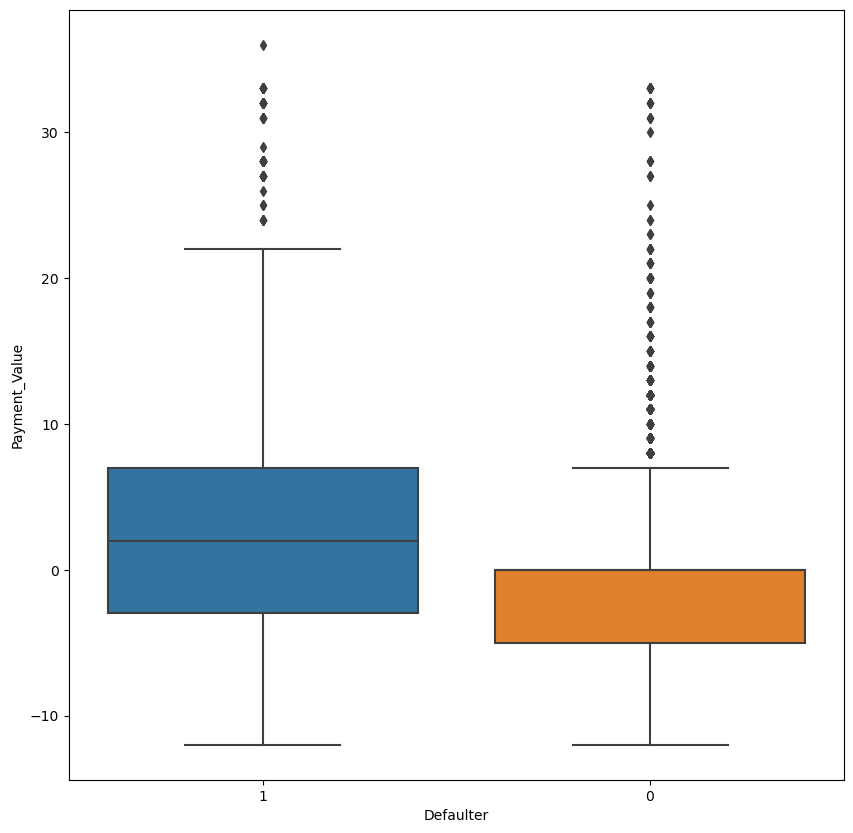

In [43]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df, x = 'Defaulter',y = 'Payment_Value')

In [44]:
df['Dues'] = (df['BILL_AMT_APR']+df['BILL_AMT_MAY']+df['BILL_AMT_JUN']+df['BILL_AMT_JUL']+df['BILL_AMT_SEPT'])-(df['PAY_AMT_APR']+df['PAY_AMT_MAY']+df['PAY_AMT_JUN']+df['PAY_AMT_JUL']+df['PAY_AMT_AUG']+df['PAY_AMT_SEPT'])

In [45]:
df.groupby('Defaulter')['Dues'].mean()

Defaulter
0    187742.051532
1    193570.044002
Name: Dues, dtype: float64

<Axes: xlabel='Defaulter', ylabel='Dues'>

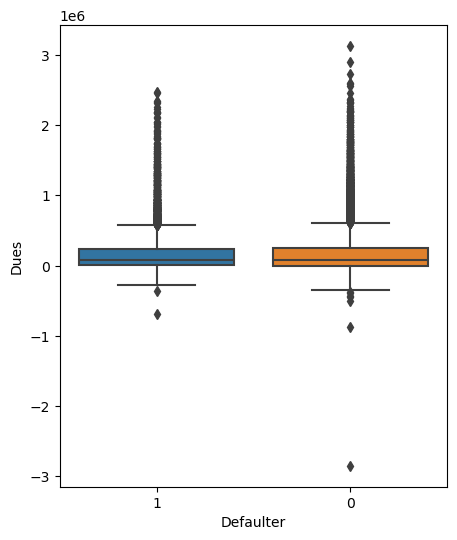

In [46]:
plt.figure(figsize = (5,6))
sns.boxplot(data = df, x = 'Defaulter',y = 'Dues')

### One-Hot Encoding

In [47]:
df = pd.get_dummies(df,columns = ['EDUCATION','MARRIAGE'] )
df.head(5)

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,Defaulter,Payment_Value,Dues,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,2,24,2,2,-1,-1,-2,-2,3913.0,...,1,-2,3913.0,0,1,0,0,1,0,0
1,120000.0,2,26,-1,2,0,0,0,2,2682.0,...,1,3,10352.0,0,1,0,0,0,1,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,0,0,76608.0,0,1,0,0,0,1,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,0,0,174713.0,0,1,0,0,1,0,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,0,-2,44620.0,0,1,0,0,1,0,0


In [48]:
df = pd.get_dummies(df, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [49]:
# Label encoding:
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df = df.replace(encoders_nums)

In [50]:
df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000.0,2,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,120000.0,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,1,0,0,0,0,0,0,0
3,50000.0,2,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'Defaulter', 'Payment_Value', 'Dues',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_SEPT_-1', 'PAY_SEPT_0',
       'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5',
       'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1', 'PAY_AUG_0',
       'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5',
       'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1', 'PAY_JUL_0',
       'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5',
       'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1', 'PAY_JUN_0',
       'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5',
       'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8', 'PAY_MAY_-1',

### Machine Learning: Classification Models
#### The classification models used for this analysis are: Logistic Regression, Decision Tree & Random Forest Classifier.
##### To build machine learning models the original data was divided into feaures(X) and target (y) and then split into train (80%) and test (20%) sets.  

In [52]:
# Feature set
X = df.drop('Defaulter',axis = 1)
# Target set
y = df['Defaulter']
c = X.columns
c

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'Payment_Value', 'Dues', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2',
       'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7',
       'PAY_SEPT_8', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2',
       'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7',
       'PAY_AUG_8', 'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2',
       'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7',
       'PAY_JUL_8', 'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2',
       'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7',
       'PAY_JUN_8', 'PAY_MAY_-1', 'PAY_MAY_0',

In [53]:
# Dividing into train and test data:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42,stratify = y)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have X_train and X_test as your feature matrices
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_train_scaled,y_train,test_size=0.2,stratify=y_train,random_state=42)

In [55]:
# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming you already have your feature matrix X_train_scaled and target vector y_train
num_features = 3
model = LogisticRegression()
rfe_stand = RFE(estimator=model, n_features_to_select=num_features)
fit_stand = rfe_stand.fit(X_train_scaled, y_train)
print('Std Model Feature Ranking:', fit_stand.ranking_)

# Calculating score for the selected features
score_stand = fit_stand.score(X_train_scaled, y_train)
print("Standardized Model Score with selected features is: %f" % score_stand)


Std Model Feature Ranking: [ 3 22 36 19 18 47 51 17  7  4  1 73 72 71 48  1  6 38 37 61 12 67 21 68
 24  1  8  2  9 33 50 70 45 13 25 64 58 39 77 40 52 55 80 49 59 69 30 23
 46 57 54 14 75 34 35 78 31 15 74 79 20 26 11 53 32 29 60 42 41 66 28 27
 62 16  5 56 43 44 65 76 10 63]
Standardized Model Score with selected features is: 0.809000


In [56]:
import pandas as pd
import numpy as np

# Assuming 'X_train_scaled' is your NumPy array
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= c)  
feature_names = np.array(X_train_scaled_df.columns)

print('Most important features (RFE): %s' % feature_names[rfe_stand.support_])


Most important features (RFE): ['PAY_AMT_AUG' 'Payment_Value' 'PAY_SEPT_0']


In [57]:
# Assuming X_train_scaled_df is your DataFrame and it contains the columns 'PAY_AMT_AUG', 'Payment_Value', and 'PAY_SEPT_0'
Ximp = X_train_scaled_df[['PAY_AMT_AUG', 'Payment_Value', 'PAY_SEPT_0']]
X_tr, X_t, y_tr, y_t = train_test_split(Ximp, y_train, test_size=0.2, stratify = y_train,random_state=42)

#### Logistic Regression

In [58]:
# Setting up the hyperparametr grid
param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2']}

In [59]:
# Performing Grid Search with Cross Validation
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring = 'accuracy')
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [60]:
# Getting the best model and evaluating on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [61]:
# 5-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))
# Printing the Classification Report
print(classification_report(y_test,y_pred))

Average 5-Fold CV Score: 0.8215 , Standard deviation: 0.0026
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [62]:
# Printing the best hyperparameters
print('Best hyperparameters:',grid_search.best_params_)

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}


In [63]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred_array = np.array(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_array)
print(cm)

[[4434  239]
 [ 863  464]]


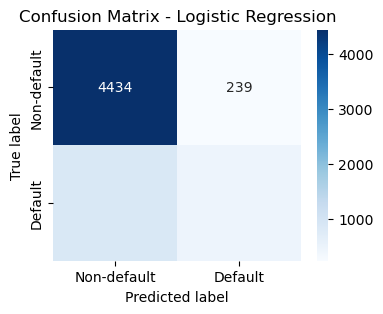

In [64]:
# Calculating Confusion Matrix
cm = confusion_matrix(y_test,y_pred_array)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

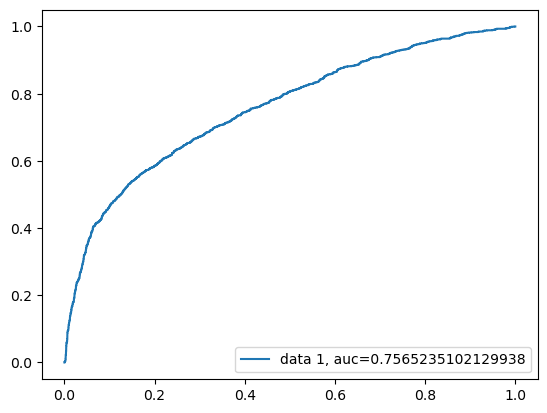

In [65]:
# Plotting ROC & AUC
y_preds_proba_lr = best_model.predict_proba(X_test_scaled)[::,1]
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba,pos_label = '1')
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [66]:
# Logistic Regression ( Most Important Features)
# Setting up the hyperparametr grid
param_grid = {'C':[0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2']}
# Performing Grid Search with Cross Validation
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring = 'accuracy')
grid_search.fit(X_tr,y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [67]:
# Getting the best model and evaluating on test set
best_model_imp = grid_search.best_estimator_
y_pred_imp = best_model_imp.predict(X_t)
# 5-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
cv_scores = cross_val_score(best_model_imp, X_tr, y_tr, cv=5)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))
# Printing the Classification Report
print(classification_report(y_t,y_pred_imp))

Average 5-Fold CV Score: 0.8101 , Standard deviation: 0.0049
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      3738
           1       0.65      0.27      0.38      1062

    accuracy                           0.81      4800
   macro avg       0.74      0.61      0.63      4800
weighted avg       0.78      0.81      0.77      4800



In [68]:
# Printing the best hyperparameters
print('Best hyperparameters:',grid_search.best_params_)

Best hyperparameters: {'C': 0.01, 'penalty': 'l2'}


In [69]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred_imp_array = np.array(y_pred_imp)
# Calculate the confusion matrix
cm = confusion_matrix(y_t, y_pred_imp_array)
print(cm)

[[3587  151]
 [ 779  283]]


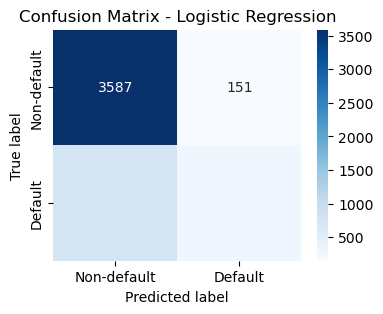

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Non-default', 'Default'],
            yticklabels=['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

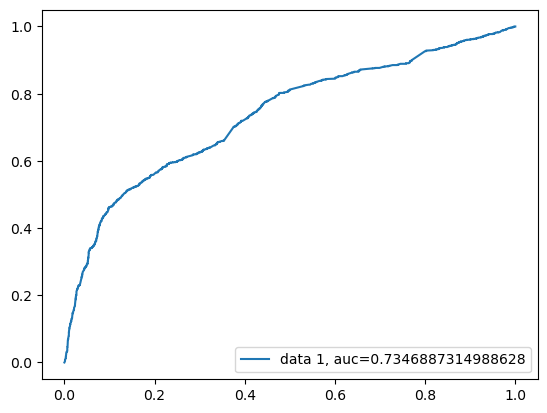

In [71]:
# Plotting ROC & AUC
y_preds_proba_lr_imp = best_model_imp.predict_proba(X_t)[::,1]
y_pred_proba = y_preds_proba_lr_imp
fpr, tpr, _ = roc_curve(y_t, y_pred_proba,pos_label = '1')
auc = roc_auc_score(y_t, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Decision Tree Classifier

In [72]:
# Dividing into train and test data:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42,stratify = y)

In [73]:
# Creating a Decision Tree Classifier Object
dt_classifier = DecisionTreeClassifier()
# Defining the hyperparameter grid for grid search
param_grid = {'criterion': ['gini','entropy'],
              'max_depth': [1,2,3,4,5,6,7,8,9],
             'max_features':[1,2,3,4,5,6,7,8,9],
             'min_samples_leaf': [1,2,3,4,5,6,7,8,9]
}
# Performing grid search with cross-validation
grid_dt = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
# Get the best model from grid search
best_dt = grid_dt.best_estimator_
# Make predictions on the test data using the best model
y_pred = best_dt.predict(X_test)
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
# Print the best hyperparameters found by grid search
print("Best hyperparameters:", grid_dt.best_params_)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.67      0.31      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.63      0.66      6000
weighted avg       0.80      0.81      0.79      6000

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 4}


In [74]:
# 5-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
cv_scores = cross_val_score(best_dt, X_train, y_train, cv=5)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 5-Fold CV Score: 0.8077 , Standard deviation: 0.0065


In [76]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert the pandas Series to a NumPy array
y_pred_array = np.array(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_array)
print(cm)

[[4474  199]
 [ 917  410]]


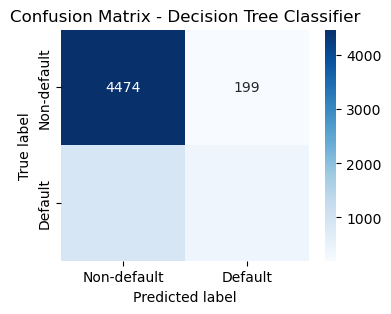

In [77]:
# Calculating Confusion Matrix
cm = confusion_matrix(y_test,y_pred_array)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree Classifier");

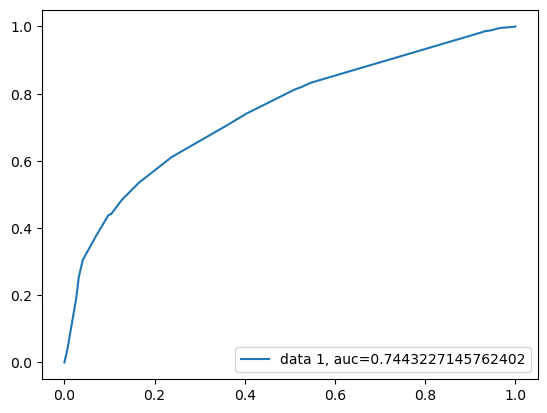

In [78]:
# Plotting ROC & AUC
y_preds_proba_dt = best_dt.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_dt
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba,pos_label = '1')
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Random Forest Classifier

In [79]:
# Dividing into train and test data:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42,stratify = y)

In [80]:
from sklearn.model_selection import RandomizedSearchCV
# Creating a Random Forest Classifier Object
rf_classifier = RandomForestClassifier()
# Defining the hyperparameter grid for grid search
param_rf = {'n_estimators': [50,100,150,200,250],
            'max_features':[1,2,3,4,5,6,7,8,9],
            'max_depth':[1,2,3,4,5,6,7,8,9],
            'criterion':['gini','entropy']
}
# Performing grid search with cross-validation
grid_rf = RandomizedSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
# Get the best model from grid search
best_rf = grid_rf.best_estimator_
# Make predictions on the test data using the best model
y_pred = best_rf.predict(X_test)
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
# Print the best hyperparameters found by grid search
print("Best hyperparameters:", grid_rf.best_params_)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000

Best hyperparameters: {'min_samples_leaf': 1, 'max_features': 8, 'max_depth': 8, 'criterion': 'entropy'}


In [81]:
# 5-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Average 5-Fold CV Score: 0.8203 , Standard deviation: 0.0013


In [82]:
import pandas as pd

y_pred_series = pd.Series(y_pred)
y_pred_series.value_counts()

0    5325
1     675
dtype: int64

In [83]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert the pandas Series to a NumPy array
y_pred_array = np.array(y_pred_series)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_array)
print(cm)

[[4447  226]
 [ 878  449]]


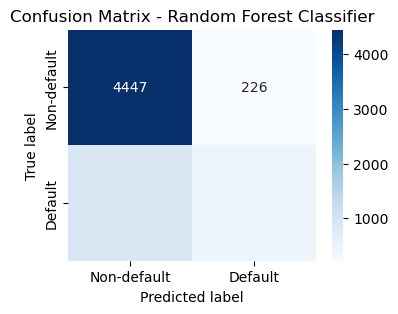

In [84]:
# Calculating Confusion Matrix
cm = confusion_matrix(y_test,y_pred_array)
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest Classifier");

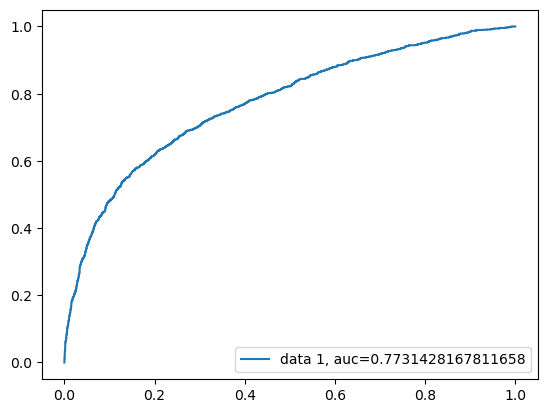

In [85]:
# Plotting ROC & AUC
y_preds_proba_rf = best_rf.predict_proba(X_test)[::,1]
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba,pos_label = '1')
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

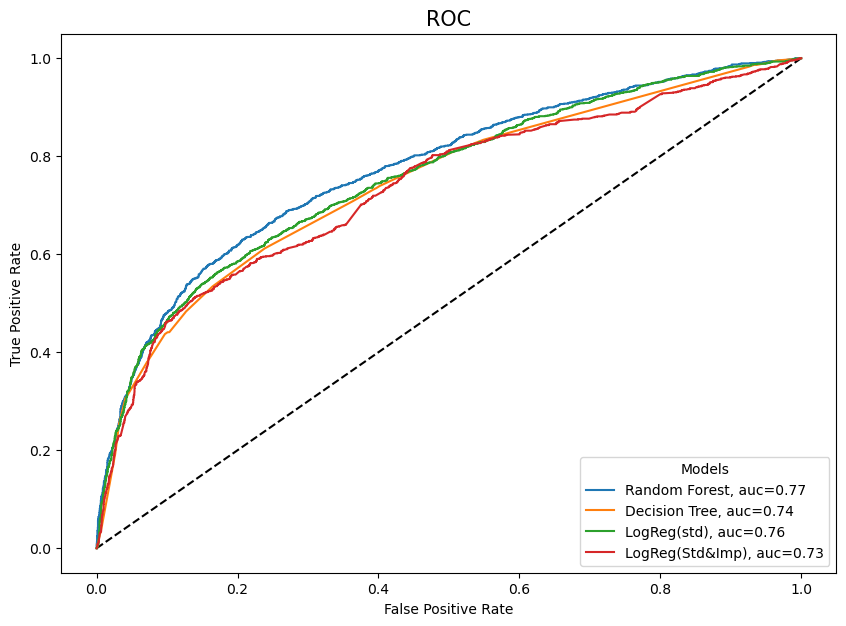

In [86]:
# Comparison of Model Performance
# The metrics used to evaluate performance of the different models: accuracy, precision, recall, f1-score, AUC (ROC), and confusion matrix were employed.
# ROC 
from sklearn import metrics
y_preds_proba_rf = best_rf.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,y_preds_proba_rf,pos_label ='1')
auc1 = metrics.roc_auc_score(y_test, y_preds_proba_rf)

y_preds_proba_dt = best_dt.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,y_preds_proba_dt,pos_label ='1')
auc2 = metrics.roc_auc_score(y_test, y_preds_proba_dt)

y_preds_proba_lr = best_model.predict_proba(X_test_scaled)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,y_preds_proba_lr,pos_label ='1')
auc3 = metrics.roc_auc_score(y_test, y_preds_proba_lr)

y_preds_proba_lr_imp = best_model_imp.predict_proba(X_t)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_t,  y_preds_proba_lr_imp,pos_label ='1')
auc4 = metrics.roc_auc_score(y_t, y_preds_proba_lr_imp)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="LogReg(std), auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="LogReg(Std&Imp), auc="+str(round(auc4,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.show()

#### The Receiver Operating Characteristic Curve (ROC) is a plot of the true positive rate against the false positive rate. If the Area Under the Curve (AUC) is high it means the model is good at distinguishing between positive and negative class.The highest AUC is attained for Random Forest Classifier which means that there is a 77% chance that the model will be able to distinguish between default class and non-default class.

In [87]:
from astropy.table import Table, Column
data_row = [('Logistic Regression','Standardized', 0.80,0.82,0.79,0.82,0.7565),
             ('Logistic Regression','Important features', 0.78,0.80,0.77,0.80,0.7343),
             ('Decision Tree','original',0.79,0.81,0.79,0.81,0.7486),
             ('Random Forest','original',0.80,0.82,0.79,0.82,0.77)]
t = Table(rows=data_row, names=('Model', 'Data', 'Precision', 'Recall', 'F1','Accuracy','AUC'))
print(t)

       Model               Data        Precision Recall  F1  Accuracy  AUC  
------------------- ------------------ --------- ------ ---- -------- ------
Logistic Regression       Standardized       0.8   0.82 0.79     0.82 0.7565
Logistic Regression Important features      0.78    0.8 0.77      0.8 0.7343
      Decision Tree           original      0.79   0.81 0.79     0.81 0.7486
      Random Forest           original       0.8   0.82 0.79     0.82   0.77


#### The Metric used to compare model performance are: Precision, Recall,F1 Score, Accuracy,AUC(ROC) & Confusion Matrix. The highest accuracy is attained for Random Forest Classifier & Logistic Regression. But since the classes are imbalanced, this metric is misleading. Precision is a good metric when the costs of false positive is high. Recall of a model is it's ability to find all positive class. We see that recall is highes for Random Forest Classifier and Logistic Regression (0.82).  Recall is an useful metric to use when the cost associated with a false negative is high, i.e the cost to a bank of incorrectly predicting credit cards which will default are high.F1 score is a weighted average of precision and recall and is an useful metric when there is imbalanced class distribution. From the model comparison chart we can conclude that the Random Forest Classifier is the best model out of these in predicting credit card default. Predicting which credit cards are likely to default will help the bank in taking corrective action beforehand to prevent the default and prevent losses.